## utility tryouts
- om te bekijken hoe utilities werken en gelinkt zijn aan decisions

In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import os
import sys
import re
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from IPython.display import display, HTML, clear_output, Image
import pandas as pd
from itertools import product
import math
from deepdiff import DeepDiff

In [42]:
sys.path.insert(1, "/workspaces/ou-af/problem2/")

In [43]:
# Styling notebook
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML("<style>" + styles + "</style")

#css_styling()

## structuur
- C1input, component 1 input
- C1output, component 1 output
- SystemHealth, system health
- C1c
- Ut2t
- Dt2t

In [44]:
diagram = gum.InfluenceDiagram()

In [45]:
# kansvariabelen

label = "C1Input"
C1input = gum.LabelizedVariable(label, label,["yes", "no"])
C1inputId = diagram.add(C1input)

label = "C1Output"
C1output = gum.LabelizedVariable(label, label,["yes", "no"])
C1outputId = diagram.add(C1output)

label = "SystemHealth"
SystemHealth = gum.LabelizedVariable(label, label,["ok", "broken"])
SystemHealthId = diagram.add(SystemHealth)

label = "C1cInput"
C1cInput = gum.LabelizedVariable(label, label,["yes", "no"])
C1cInputId = diagram.add(C1cInput)

In [46]:
Dt2t = gum.LabelizedVariable("dt2t", "dt2t",["yes", "no"])
Dt2tId = diagram.addDecisionNode(Dt2t)


Ut2t = gum.LabelizedVariable("Ut2t", "Ut2t",1)
Ut2tId = diagram.addUtilityNode(Ut2t)


In [47]:
diagram.addArc("C1Input", "Ut2t")
diagram.addArc("SystemHealth", "Ut2t")
#diagram.addArc("C1Output", "Ut2t")
diagram.addArc("C1cInput", "Ut2t")


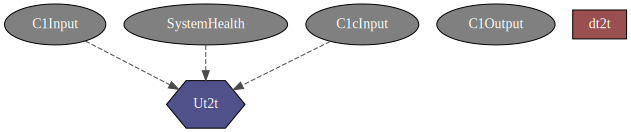

In [48]:
gnb.showInfluenceDiagram(diagram, size=60)

## configuratie

In [11]:
y, n = "yes", "no"
o, b = "ok", "broken"
diagram.cpt(C1inputId)[{"C1input":y}] = 0.8
diagram.cpt(C1inputId)[{"C1input":n}] = 0.2

diagram.cpt(C1healthId)[{"C1health":o}] = 0.51
diagram.cpt(C1healthId)[{"C1health":b}] = 0.49

diagram.cpt(C1outputId)[{"C1input":y, "C1health":o}] = [0.9, 0.1]
diagram.cpt(C1outputId)[{"C1input":y, "C1health":b}] = [0.1, 0.9]
diagram.cpt(C1outputId)[{"C1input":n, "C1health":o}] = [0.1, 0.9]
diagram.cpt(C1outputId)[{"C1input":n, "C1health":b}] = [0.1, 0.9]

diagram.cpt(TO1id)[{"C1health":o, "t1":y}] = [0.98,0.01,0.01]
diagram.cpt(TO1id)[{"C1health":o, "t1":n}] = [0.01,0.01,0.98]
diagram.cpt(TO1id)[{"C1health":b, "t1":y}] = [0.01,0.98,0.01]
diagram.cpt(TO1id)[{"C1health":b, "t1":n}] = [0.01,0.01,0.98]

In [54]:
# deze tabel gebruiken in overleaf

gnb.flow.row(diagram.utility(diagram.idFromName("Ut2t")))


In [52]:
y, n = "yes", "no"
ok, broken = "ok", "broken"
diagram.utility(Ut2tId)[{"SystemHealth":ok, "C1Input":y, "C1cInput":y}] = 100
diagram.utility(Ut2tId)[{"SystemHealth":ok, "C1Input":n, "C1cInput":n}] = 100

diagram.utility(Ut2tId)[{"SystemHealth":broken, "C1Input":y, "C1cInput":n}] = 80
diagram.utility(Ut2tId)[{"SystemHealth":broken, "C1Input":n, "C1cInput":y}] = 80


diagram.utility(Ut2tId)[{"SystemHealth":ok, "C1Input":y, "C1cInput":n}] = 0
diagram.utility(Ut2tId)[{"SystemHealth":ok, "C1Input":n, "C1cInput":y}] = 0
diagram.utility(Ut2tId)[{"SystemHealth":broken, "C1Input":y, "C1cInput":y}] = 0
diagram.utility(Ut2tId)[{"SystemHealth":broken, "C1Input":n, "C1cInput":n}] = 0



In [14]:
gnb.flow.row(diagram.utility(T1Uid), diagram.utility(RC1Uid)) 

## inference

In [15]:
evs = {
#    "t1":0,       # 0:yes, 1: no
#    "to1":1,      # 0:ok, 1:broken, 2:notdone
#    "rc1":1,      # 0:yes, 1:no
#    "C1health":0  # 0:ok, 1: broken
}

In [16]:
ie = gum.ShaferShenoyLIMIDInference(diagram) 
ie.setEvidence(evs)
#ie.addNoForgettingAssumption(["DecisionTestObserveHealthSwitch","DecisionReplaceSwitch", "DecisionTestObserveHealthLight", "DecisionReplaceLight"])
gnb.sideBySide(gnb.getInference(diagram,engine=ie, evs=evs, size=200))



In [17]:
print(ie.optimalDecision(RC1id))
print(ie.MEU())


  rc1              |
yes      |no       |
---------|---------|
 1.0000  | 0.0000  |

{'mean': 4.9, 'variance': 24.989999999999995}


In [18]:
#utility belief Health:ok/broken + replace yes berekening: 
print((.51 * 0) + (.49 * 10))

#utility belief health:ok/broken + replace no berekening: 
#print(.8 * 20 + .2 * 2)

4.9


In [19]:
gnb.flow.row(diagram.utility(T1Uid), diagram.utility(RC1Uid)) 

In [20]:
b = ie.posterior(C1healthId)[1] * diagram.utility(RC1Uid)[{"rc1":y, "C1health":b}][0]

In [21]:
diagram.utility(RC1Uid)[{"rc1":y, "C1health":b}][0]

TypeError: in method 'Instantiation_chgVal', argument 3 of type 'std::string const &'
Additional information:
Wrong number or type of arguments for overloaded function 'Instantiation_chgVal'.
  Possible C/C++ prototypes are:
    gum::Instantiation::chgVal(gum::DiscreteVariable const &,gum::Idx)
    gum::Instantiation::chgVal(gum::DiscreteVariable const *,gum::Idx)
    gum::Instantiation::chgVal(gum::Idx,gum::Idx)
    gum::Instantiation::chgVal(std::string const &,gum::Idx)
    gum::Instantiation::chgVal(std::string const &,std::string const &)


In [ ]:
jt = ie.junctionTree()

In [ ]:
jt

In [ ]:
for n in jt.nodes():
    print([diagram.variable(n).name() for n in jt.clique(n)])

In [ ]:
for e in jt.edges():
    print(f"Separator for {e} : {jt.clique(e[0]).intersection(jt.clique(e[1]))}")

## uitbreiden diagram

In [ ]:
label = "C2input"
C2input = gum.LabelizedVariable(label, label,["yes", "no"])
C2inputId = diagram.add(C2input)
label = "C2output"
C2output = gum.LabelizedVariable(label, label,["yes", "no"])
C2outputId = diagram.add(C2output)
label = "C2health"
C2health = gum.LabelizedVariable(label, label,["ok", "broken"])
C2healthId = diagram.add(C2health)

In [ ]:
T2 = gum.LabelizedVariable("t2", "t2",["yes", "no"])
T2id = diagram.addDecisionNode(T2)
T2U = gum.LabelizedVariable("t2u", "t2u",1)
T2Uid = diagram.addUtilityNode(T2U)
TO2 = gum.LabelizedVariable("to2", "to2", ["ok", "broken", "notdone"])
TO2id = diagram.addChanceNode(TO2)

In [ ]:
diagram.addArc("C1output", "C2input")
diagram.addArc("C2input", "C2output")
diagram.addArc("C2health", "C2output")
diagram.addArc("C2health", "to2")
diagram.addArc("t2", "to2")
diagram.addArc("t2", "t2u")

In [ ]:
y, n = "yes", "no"
o, b = "ok", "broken"
diagram.cpt(C2inputId)[{"C2input":y}] = 0.8
diagram.cpt(C2inputId)[{"C2input":n}] = 0.2

diagram.cpt(C2healthId)[{"C2health":o}] = 0.51
diagram.cpt(C2healthId)[{"C2health":b}] = 0.49

diagram.cpt(C2outputId)[{"C2input":y, "C2health":o}] = [0.9, 0.1]
diagram.cpt(C2outputId)[{"C2input":y, "C2health":b}] = [0.1, 0.9]
diagram.cpt(C2outputId)[{"C2input":n, "C2health":o}] = [0.1, 0.9]
diagram.cpt(C2outputId)[{"C2input":n, "C2health":b}] = [0.1, 0.9]

diagram.cpt(TO2id)[{"C2health":o, "t2":y}] = [0.98,0.01,0.01]
diagram.cpt(TO2id)[{"C2health":o, "t2":n}] = [0.01,0.01,0.98]
diagram.cpt(TO2id)[{"C2health":b, "t2":y}] = [0.01,0.98,0.01]
diagram.cpt(TO2id)[{"C2health":b, "t2":n}] = [0.01,0.01,0.98]

In [ ]:
gnb.flow.row(diagram.cpt(C2inputId), diagram.cpt(C2outputId), diagram.cpt(C2healthId), diagram.cpt(TO2id))


In [ ]:
gnb.showInfluenceDiagram(diagram, size=60)

In [ ]:
y, n = "yes", "no"
o, b = "ok", "broken"
diagram.utility(T1Uid)[{"t1":y}] = 0
diagram.utility(T1Uid)[{"t1":n}] = 0
diagram.utility(RC1Uid)[{"rc1":y, "C1health":b}] = 0
diagram.utility(RC1Uid)[{"rc1":y, "C1health":o}] = 0
diagram.utility(RC1Uid)[{"rc1":n, "C1health":o}] = 0
diagram.utility(RC1Uid)[{"rc1":n, "C1health":b}] = 0

diagram.utility(T2Uid)[{"t2":y}] = 1
diagram.utility(T2Uid)[{"t2":n}] = 0


In [ ]:
ie = gum.ShaferShenoyLIMIDInference(diagram) 
ie.setEvidence(evs)
#ie.addNoForgettingAssumption(["DecisionTestObserveHealthSwitch","DecisionReplaceSwitch", "DecisionTestObserveHealthLight", "DecisionReplaceLight"])
gnb.sideBySide(gnb.getInference(diagram,engine=ie, evs=evs, size=60))



In [ ]:
jt = ie.junctionTree()

In [ ]:
jtdot = jt.toDot()

In [ ]:
for n in jt.nodes():
    print([diagram.variable(n).name() for n in jt.clique(n)])

In [ ]:
for e in jt.edges():
    print(f"Separator for {e} : {jt.clique(e[0]).intersection(jt.clique(e[1]))}")

In [ ]:
#ie.addNoForgettingAssumption(["Decision1","Decision2"])
gnb.sideBySide(ie.reducedLIMID(),ie.junctionTree(),gnb.getInference(diagram,engine=ie))

In [ ]:
import graphviz as gv

In [ ]:
gv.Source(jtdot)

In [ ]:
diagramDot = diagram.toDot()

In [ ]:
gv.Source(diagramDot)